In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt

slurm_files = [
    'results_4_23/slurm-19338.out',
    'results_4_23/slurm-19339.out',
    'results_4_23/slurm-19340.out',
    'results_4_23/slurm-19341.out',
    'results_4_23/slurm-19344.out',
    'results_4_23/slurm-19345.out',
    'results_4_23/slurm-19346.out',
    'results_4_23/slurm-19347.out',
    'results_4_23/slurm-19348.out',
    'results_4_23/slurm-19349.out',
    'results_4_23/slurm-19350.out',
    'results_4_23/slurm-19351.out',
    'results_4_23/slurm-19352.out',
    
]


for slurm_file in slurm_files:

    break
    
    print(slurm_file)
    with open(slurm_file, 'r') as f:
        lines = f.readlines()

        
        train_losses = []
        val_losses = []
        for line in lines:
            # print(line)
            if 'train loss' in line:
                train_loss = line.split()[-4]
                train_loss = train_loss[:-1]
                val_loss = line.split()[-1]
                # print(train_loss, val_loss)
                train_losses.append(float(train_loss))
                val_losses.append(float(val_loss))

            

    plt.plot(train_losses[300:], label='train loss')
    plt.plot(val_losses[300:], label='val loss')
    plt.legend()
    plt.show()


In [3]:
import pickle
import numpy as np

m = float('inf')
total = 0
for i in range(10):
    with open('2d/{}/dataset.pkl'.format(i), 'rb') as f:
        dataset = pickle.load(f)

    dataset = np.array(dataset)
    print(dataset.shape)

    m = min(m, dataset.shape[0])
    total += dataset.shape[0]


print(m)
print(total)

(39015, 7)
(37871, 7)
(34012, 7)
(40136, 7)
(32092, 7)
(28692, 7)
(33055, 7)
(37766, 7)
(38902, 7)
(31963, 7)
28692
353504


In [7]:
for i in range(0,10):

    temp = pickle.load(open('envs/2d/env'+str(i)+'.pkl', 'rb'))
    
    temp = np.array(temp)
    
    print(temp.shape)
    print(temp)
    temp = temp.flatten()
    print(temp.shape)
    print(temp)

    break

(7, 4)
[[ -1   2   5  15]
 [  5 -10  15   5]
 [-18   9   5   5]
 [-20 -10  10   5]
 [-17  -8  10   5]
 [-18 -17   5   5]
 [-12   9  15   5]]
(28,)
[ -1   2   5  15   5 -10  15   5 -18   9   5   5 -20 -10  10   5 -17  -8
  10   5 -18 -17   5   5 -12   9  15   5]


(1400, 2)
(39015, 7)


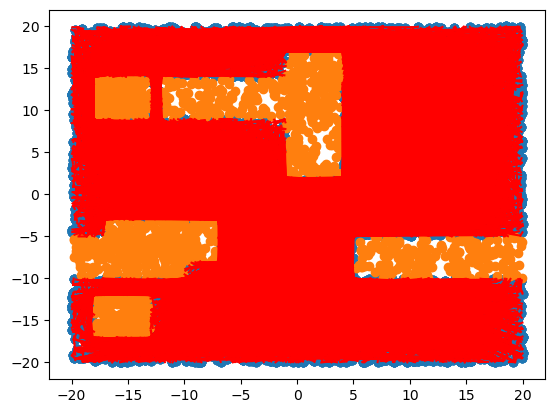

In [8]:

with open('envs/2d/env0_pc.pkl', 'rb') as f:
    env = pickle.load(f)

env = np.array(env)
print(env.shape)

with open('2d/0/dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)



dataset = np.array(dataset)
print(dataset.shape)


# group by start and goal
start = dataset[:,0:2]
goal = dataset[:,2:4]

# make a list of points with same start and goal
# for each point, find the min cost

points = {}

for i in range(dataset.shape[0]):
    s = tuple(start[i])
    g = tuple(goal[i])

    if (s,g) not in points:
        points[(s,g)] = []

    points[(s,g)].append(dataset[i,4:6])



for i, key in enumerate(points):
    points[key] = np.array(points[key])

    # print lines connecting the points
    pts = points[key]
    for j in range(1, pts.shape[0]):
        plt.plot([pts[j-1,0], pts[j,0]], [pts[j-1,1], pts[j,1]], 'r')


    if i == 10000:
        break



# x = dataset[:,0]
# y = dataset[:,1]

# plt.scatter(x, y)

# plot points
plt.scatter(env[:,0], env[:,1])
plt.show()
